In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_excel(r'D:\code\billing_data\Dataset.xlsx')
data.head()

,Account ID,Customer Name,Billing Date,Amount,Status,Description,Department
0,1001,David Wilson,2023-01-01,193.987558,Pending,Consultation,Pediatrics
1,1002,Alice Johnson,2023-01-02,370.656021,Pending,Purchase,Orthopedics
2,1003,Sophia Garcia,2023-01-03,233.019486,Pending,Lab Test,Pharmacy
3,1004,Olivia Davis,2023-01-04,296.120725,Paid,Follow-up,Pharmacy
4,1005,David Wilson,2023-01-05,294.654764,Paid,Therapy,ENT


In [13]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Check data types to validate if columns have correct types
data_types = data.dtypes

# Check for inconsistencies in categorical columns (like misspellings)
unique_values = {
    'Status': data['Status'].unique(),
    'Department': data['Department'].unique(),
    'Description': data['Description'].unique()
}

# Check for outliers in the Amount column
outliers = data['Amount'].describe()

missing_values, data_types, unique_values, outliers


(Account ID       0
 Customer Name    0
 Billing Date     0
 Amount           0
 Status           0
 Description      0
 Department       0
 dtype: int64,
 Account ID                int64
 Customer Name            object
 Billing Date     datetime64[ns]
 Amount                  float64
 Status                   object
 Description              object
 Department               object
 dtype: object,
 {'Status': array(['Pending', 'Paid', 'Unpaid', 'Unknown'], dtype=object),
  'Department': array(['Pediatrics', 'Orthopedics', 'Pharmacy', 'ENT', 'General Practice',
         'Neurology', 'Cardiology', 'Dermatology', 'Unknown', 'Radiology',
         'Oncology'], dtype=object),
  'Description': array(['Consultation', 'Purchase', 'Lab Test', 'Follow-up', 'Therapy',
         'Procedure', 'Emergency', 'Medication', 'Miscellaneous', 'Refund',
         'Service Fee'], dtype=object)},
 count     110.000000
 mean      479.309018
 std       738.759966
 min        50.581003
 25%       145.411712
 50% 

In [14]:
#before cleaning
mean_data=data['Amount'].mean()
print(mean_data.__round__(2))
std_data=data['Amount'].std()
print(std_data)

479.31
738.7599662437997


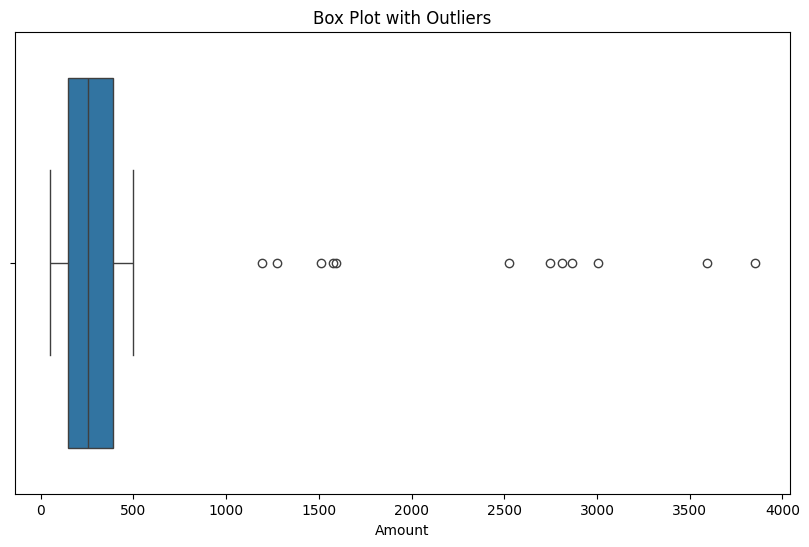

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Amount'])
plt.title('Box Plot with Outliers')
plt.xlabel('Amount')
plt.show()

In [16]:
# Identify outliers using the Interquartile Range (IQR) method
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for non-outlier values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print

# Filter out outliers from the dataset
filtered_data = data[(data['Amount'] >= lower_bound) & (data['Amount'] <= upper_bound)]
# Assuming `filtered_data` is your DataFrame
for amount in filtered_data['Amount']:
    if amount > 500:
        print(f"Outlier detected: {amount}")

# Recalculate the mean of the filtered data
ideal_mean = filtered_data['Amount'].mean()
ideal_mean
filtered_data


 


,Account ID,Customer Name,Billing Date,Amount,Status,Description,Department
0,1001,David Wilson,2023-01-01,193.987558,Pending,Consultation,Pediatrics
1,1002,Alice Johnson,2023-01-02,370.656021,Pending,Purchase,Orthopedics
2,1003,Sophia Garcia,2023-01-03,233.019486,Pending,Lab Test,Pharmacy
3,1004,Olivia Davis,2023-01-04,296.120725,Paid,Follow-up,Pharmacy
4,1005,David Wilson,2023-01-05,294.654764,Paid,Therapy,ENT
...,...,...,...,...,...,...,...
104,1020,Olivia Davis,2023-01-20,94.776324,Paid,Consultation,Dermatology
105,1026,Chris Lee,2023-01-26,182.072114,Unpaid,Follow-up,Orthopedics
106,1027,Olivia Davis,2023-01-27,87.943419,Paid,Follow-up,Radiology
108,1029,John Doe,2023-01-29,72.217921,Paid,Service Fee,Unknown


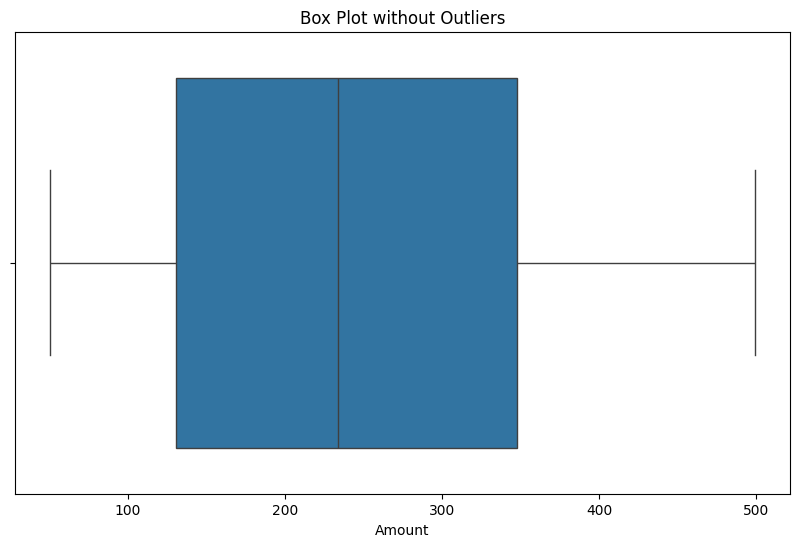

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_data['Amount'])
plt.title('Box Plot without Outliers')
plt.xlabel('Amount')
plt.show()

In [17]:
for amount in data['Amount']:
    if amount > 500:
        print(f"outliers detected:{amount}")

outliers detected:2864.73848815692
outliers detected:2748.47875346206
outliers detected:1194.21687315506
outliers detected:1274.90126295126
outliers detected:1589.82077859131
outliers detected:2812.33008947349
outliers detected:1573.70343652934
outliers detected:3006.66139178412
outliers detected:3849.77133065895
outliers detected:3593.75296336672
outliers detected:2526.25834276964
outliers detected:1511.13728990272


In [24]:
print(filtered_data.head(10))
print(filtered_data.dtypes())

    Account ID  Customer Name Billing Date      Amount   Status   Description  \
0         1001   David Wilson   2023-01-01  193.987558  Pending  Consultation   
1         1002  Alice Johnson   2023-01-02  370.656021  Pending      Purchase   
2         1003  Sophia Garcia   2023-01-03  233.019486  Pending      Lab Test   
3         1004   Olivia Davis   2023-01-04  296.120725     Paid     Follow-up   
4         1005   David Wilson   2023-01-05  294.654764     Paid       Therapy   
5         1006   Olivia Davis   2023-01-06  485.654759     Paid     Procedure   
7         1008  Sophia Garcia   2023-01-08  244.228596  Pending       Therapy   
8         1009  Sophia Garcia   2023-01-09  183.370132  Pending     Emergency   
9         1010   Olivia Davis   2023-01-10  127.601073   Unpaid    Medication   
10        1011      Chris Lee   2023-01-11  167.993019  Pending  Consultation   

          Department  
0         Pediatrics  
1        Orthopedics  
2           Pharmacy  
3           Phar

TypeError: 'Series' object is not callable